## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_dataframe_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])


# Display the data table for preview
merged_dataframe_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
unique_mice_list = merged_dataframe_df["Mouse ID"].unique()
len(unique_mice_list)
# alternative option to calculate this: unique_mice_list.shape[0]

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_df = merged_dataframe_df[merged_dataframe_df.duplicated(['Mouse ID','Timepoint'], keep = False)]
duplicate_data_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# establish mouse ID that needs to be excluded
mouseID_to_exclude = duplicate_data_df["Mouse ID"].unique()
print(f"number of mouse ID's to exclude: {len(mouseID_to_exclude)}")
print(f"mouse ID's to exclude: {mouseID_to_exclude}")
# alternaive code to establish mouse ID: str(mouseID_to_exclude[0])

number of mouse ID's to exclude: 1
mouse ID's to exclude: ['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ID_data = merged_dataframe_df.loc[merged_dataframe_df['Mouse ID'] == "g989"]
duplicated_mouse_ID_data


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_data_df = merged_dataframe_df.loc[merged_dataframe_df['Mouse ID'] != "g989"]
unique_data_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice_list = unique_data_df["Mouse ID"].unique()
len(unique_mice_list)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
drug_sorted = unique_data_df.groupby(["Drug Regimen"])
drug_sorted
drug_summary_stat = drug_sorted["Tumour Volume (mm3)"].mean()
drug_summary_stats = pd.DataFrame(drug_summary_stat)
drug_summary_stats.rename(columns = {"Tumour Volume (mm3)":"mean"}, inplace = True)
drug_summary_stats["median"] = drug_sorted["Tumour Volume (mm3)"].median()
drug_summary_stats["variance"] = drug_sorted["Tumour Volume (mm3)"].var()
drug_summary_stats["standard deviation"] = drug_sorted["Tumour Volume (mm3)"].std()
drug_summary_stats["SEM"] = drug_sorted["Tumour Volume (mm3)"].sem()
drug_summary_stats
# alternate method for obtaining most of the stats: drug_summary_stats = drug_sorted["Tumour Volume (mm3)"].describe()


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_stats_df = drug_sorted["Tumour Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
aggregate_stats_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

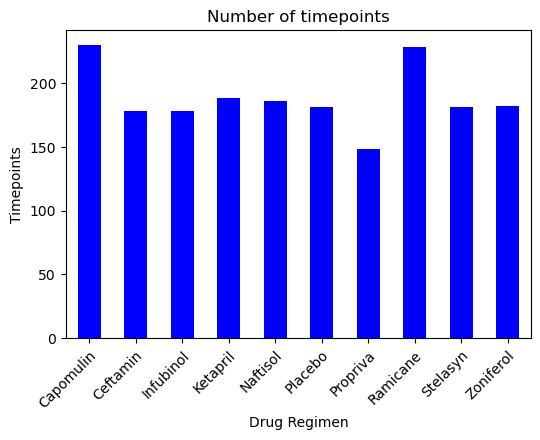

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Configure plot, figsize, title, and axis labels
drug_summary_stats["count"] = drug_sorted["Tumour Volume (mm3)"].count()
figure1 = drug_summary_stats["count"].plot(kind="bar", color=["blue"], figsize=(6,4),
                                   title="Number of timepoints")

figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("Timepoints")
xticklabels = drug_summary_stats.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()


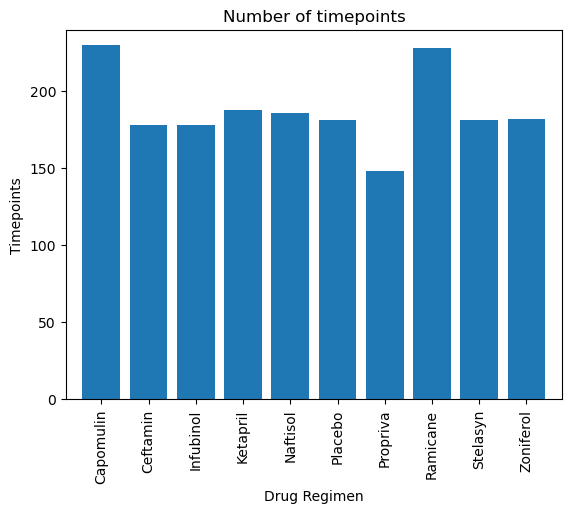

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis =np.arange(len(drug_summary_stats))
x_axis
plt.bar(x_axis, drug_summary_stats["count"])
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_summary_stats.index, rotation="vertical")
# Set the limits of the x and y axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_summary_stats["count"])+10)
# Give the chart a title, x label, and y label
plt.title("Number of timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()


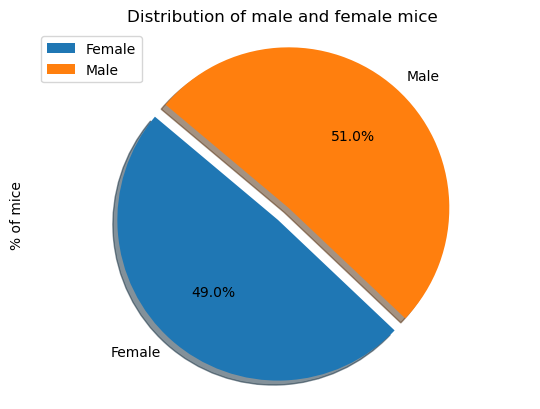

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# unique_data_df["Timepoint"].sum()
mice = unique_data_df.groupby(unique_data_df["Sex"])
mice_df = mice.count()
mice_df
mice_df["% of mouse"] = (mice_df["Mouse ID"]/mice_df["Mouse ID"].sum())*100
mice_df
explode = (0.1,0)
piechart = mice_df.plot(kind="pie", y="% of mouse", explode=explode, autopct="%.1f%%", shadow=True, startangle=140, title=("Distribution of male and female mice"))
piechart.set_ylabel("% of mice")

plt.axis("equal")
plt.show()

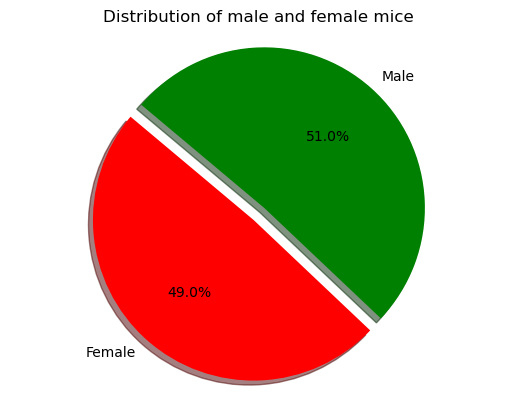

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pies = mice_df.index
pies
pie_votes = [47,37,32,27,25,24,24,21,18,16]
colours = ["red","green"]
# explode = (0.1,0)
plt.pie(mice_df["% of mouse"], explode=explode, labels=mice_df.index, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of male and female mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# # check for maximum timepoint, ensure that there is only one value.

max_timepoint = unique_data_df.groupby(["Mouse ID"])
max_timepoint_df = max_timepoint.max()
max_timepoint_df = max_timepoint_df["Timepoint"]
max_timepoint_df

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
mergeddata_df = pd.merge(max_timepoint_df, merged_dataframe_df, on=["Mouse ID", "Timepoint"])
mergeddata_df


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumour vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumorvolume_df = pd.DataFrame()


for drug in treatments:
    result = mergeddata_df.loc[mergeddata_df["Drug Regimen"] ==  drug]
    result.reset_index(inplace = True)
    tumorvolume_df[drug] = result["Tumour Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumour volumes  
    # add subset 
    # Determine outliers using upper and lower bounds


lowerq = []
upperq = []
iqr = []
lower_bound = []
upper_bound = []

for drug in treatments:
    quartiles = tumorvolume_df[drug].quantile([.25,.5,.75])
    lowerq.append(quartiles[0.25])
    upperq.append(quartiles[0.75])
    iqr.append(quartiles[0.75]-quartiles[0.25])
    lower_bound.append(quartiles[0.25] - (1.5*(quartiles[0.75]-quartiles[0.25])))
    upper_bound.append(quartiles[0.75] + (1.5*(quartiles[0.75]-quartiles[0.25])))

for i in range(4):
    print(f"For {treatments[i]} treatment:")
    print(f"The lower quartile is {lowerq[i]}")
    print(f"The upper quartile is {upperq[i]}")
    print(f"The inter quartile range is {iqr[i]}")
    print(f"Results lower than {lower_bound[i]} or higher than {upper_bound[i]} might be outliers")
    print()



    

For Capomulin treatment:
The lower quartile is 32.37735684
The upper quartile is 40.1592203
The inter quartile range is 7.781863460000004
Results lower than 20.70456164999999 or higher than 51.83201549 might be outliers

For Ramicane treatment:
The lower quartile is 31.56046955
The upper quartile is 40.65900627
The inter quartile range is 9.098536719999998
Results lower than 17.912664470000003 or higher than 54.30681135 might be outliers

For Infubinol treatment:
The lower quartile is 54.04860769
The upper quartile is 65.52574285
The inter quartile range is 11.477135160000003
Results lower than 36.83290494999999 or higher than 82.74144559000001 might be outliers

For Ceftamin treatment:
The lower quartile is 48.72207785
The upper quartile is 64.29983003
The inter quartile range is 15.577752179999997
Results lower than 25.355449580000002 or higher than 87.66645829999999 might be outliers



<AxesSubplot:title={'center':'Drug Regimen VS final tumor volume '}, ylabel='Final tumor volume'>

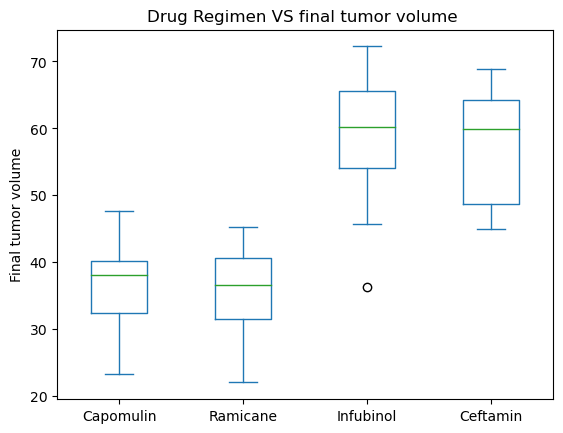

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
tumorvolume_df.plot(kind="box", ylabel="Final tumor volume", title="Drug Regimen VS final tumor volume ")


## Line and Scatter Plots

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


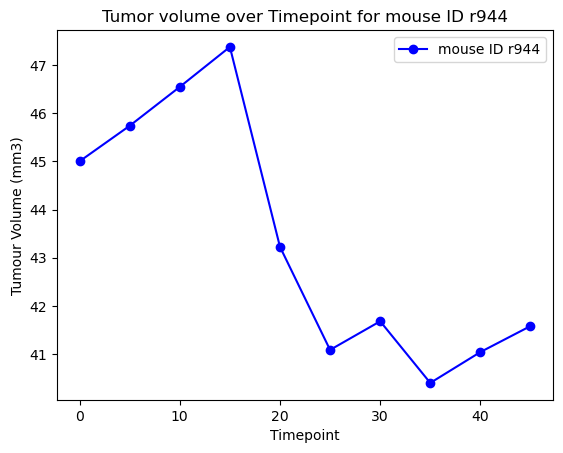

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

lineplotdata_df = unique_data_df.loc[unique_data_df["Drug Regimen"] == "Capomulin"]
print(lineplotdata_df["Mouse ID"].unique())
lineplotdata1_df = unique_data_df.loc[(unique_data_df["Drug Regimen"] == "Capomulin") & (unique_data_df["Mouse ID"] == "r944")]
# print(lineplotdata1_df)

x_axis = lineplotdata1_df["Timepoint"]
y_axis = lineplotdata1_df["Tumour Volume (mm3)"]
tumor, = plt.plot(x_axis, y_axis, marker='o', color='blue', label="mouse ID r944")
plt.legend(loc="upper right")
plt.title("Tumor volume over Timepoint for mouse ID r944")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.show()

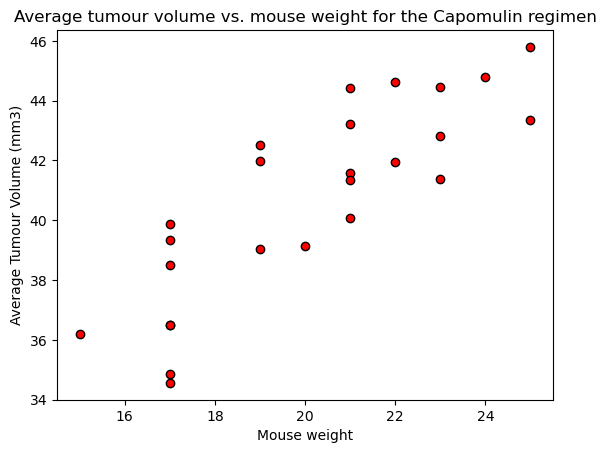

In [18]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
# print(lineplotdata_df)
scatter = lineplotdata_df.groupby(["Mouse ID"])
scatter_df = scatter.mean()
weight = scatter_df["Weight (g)"]
avetumor = scatter_df["Tumour Volume (mm3)"]
plt.scatter(weight, avetumor, marker="o", facecolors="red", edgecolors="black")
plt.title("Average tumour volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Mouse weight")
plt.ylabel("Average Tumour Volume (mm3)")
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

round(st.pearsonr(weight,avetumor)[0],2)
print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(weight,avetumor)[0],2)}")

The correlation coefficient between malic acid and flavanoids is 0.84


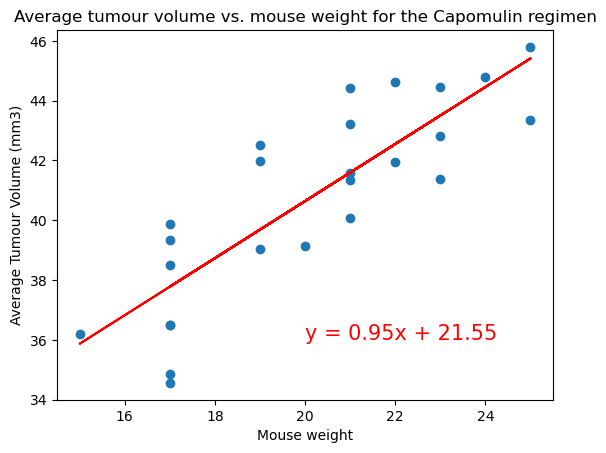

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avetumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avetumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Average tumour volume vs. mouse weight for the Capomulin regimen")
plt.xlabel('Mouse weight')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()